## **Load Dataset**

In [321]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [322]:
df = pd.read_csv("/content/company_esg_financial_dataset.csv")
df.head()

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


## **Exploratory Data Analysis (EDA)**

In [323]:
df.shape

(11000, 16)

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [325]:
df.describe()

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09


In [326]:
# Number of Unique Values in that particular columns
for col in df.columns:
    print(f"{col} has {len(df[col].unique())} unique")

CompanyID has 1000 unique
CompanyName has 1000 unique
Industry has 9 unique
Region has 7 unique
Year has 11 unique
Revenue has 9965 unique
ProfitMargin has 536 unique
MarketCap has 10385 unique
GrowthRate has 563 unique
ESG_Overall has 823 unique
ESG_Environmental has 991 unique
ESG_Social has 966 unique
ESG_Governance has 995 unique
CarbonEmissions has 10994 unique
WaterUsage has 10986 unique
EnergyConsumption has 10997 unique


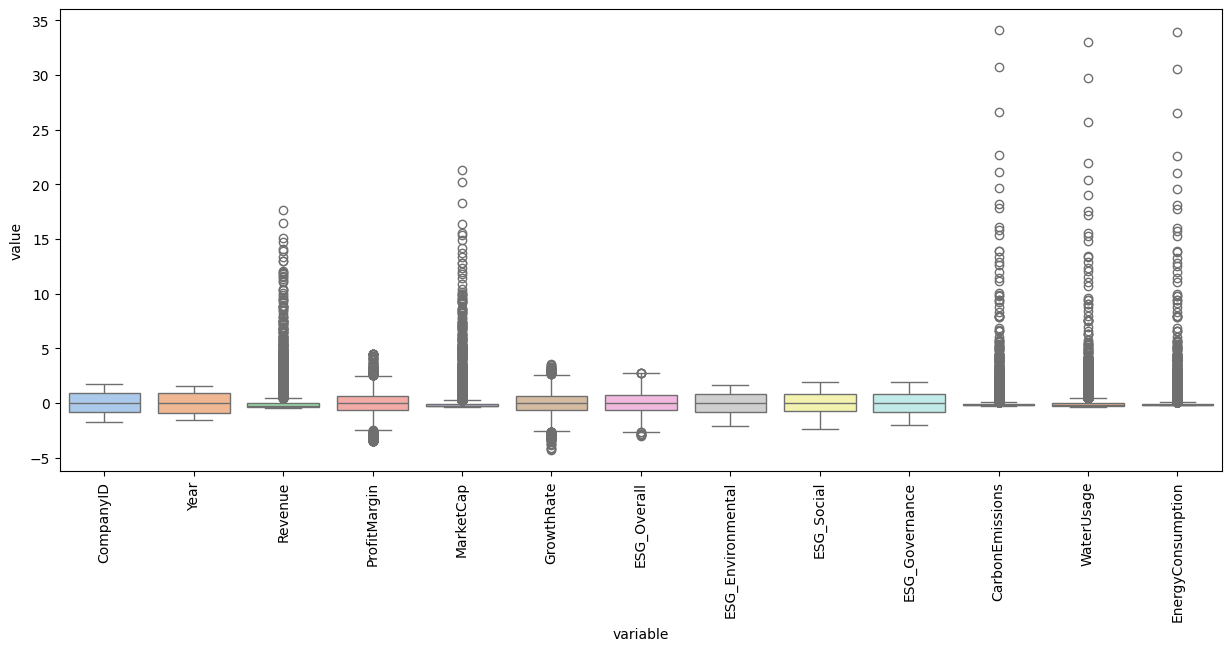

In [327]:
# Boxplot of Scaled DataFrame
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df.select_dtypes(include=np.number)),
                         columns=df.select_dtypes(include=np.number).columns)
# Convert the scaled data back to a DataFrame before passing to sns.boxplot


plt.figure(figsize=(15, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(scaled_df), palette="pastel")
plt.xticks(rotation=90)
plt.show()

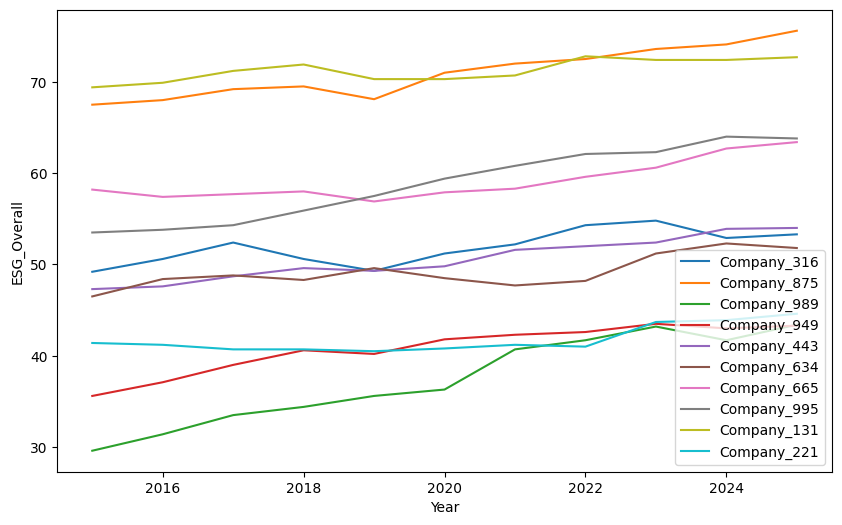

In [328]:
# ESG_Overall vs Year for 10 random companies
some_comp = np.random.choice(df["CompanyName"].unique(), 10, replace=False)
plt.figure(figsize=(10, 6))
for comp in some_comp:
    sns.lineplot(x="Year", y="ESG_Overall", data=df[df["CompanyName"]==comp], ci=None, label=comp)
plt.legend()
plt.show()

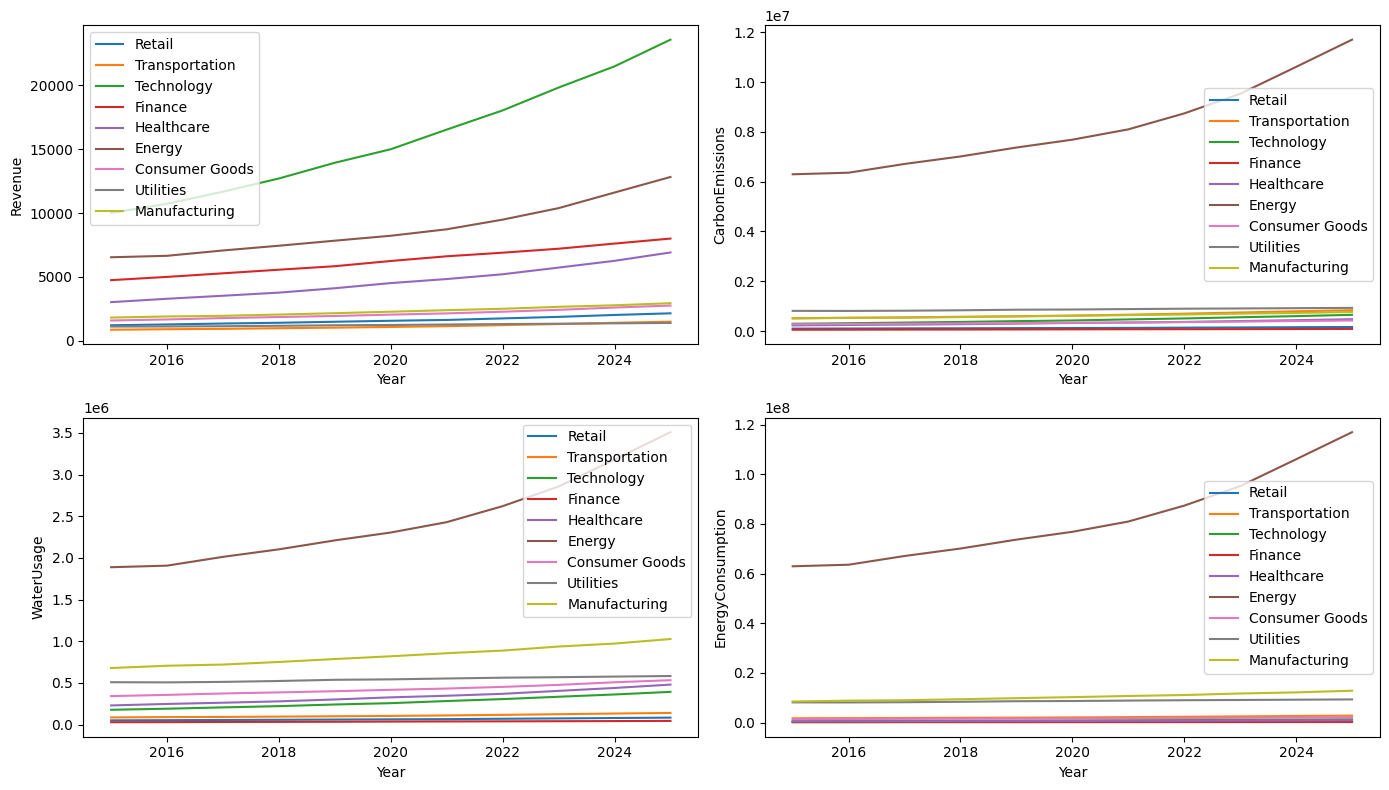

In [329]:
# plot of Average Revenue, CarbonEmission, WaterUsage, EnergyConsumption over past years for different industries.
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
cols = ["Revenue", "CarbonEmissions", "WaterUsage", "EnergyConsumption"]
axes = axes.flatten()  # Flatten the 2x2 array to a 1D array

for i, col in enumerate(cols):
    for industry in df["Industry"].unique():
        sns.lineplot(x="Year", y=col, data=df[df["Industry"]==industry], label=industry, ci=None, ax=axes[i])
        # plt.title(f"{col} vs Year for Different Industries")
    axes[i].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


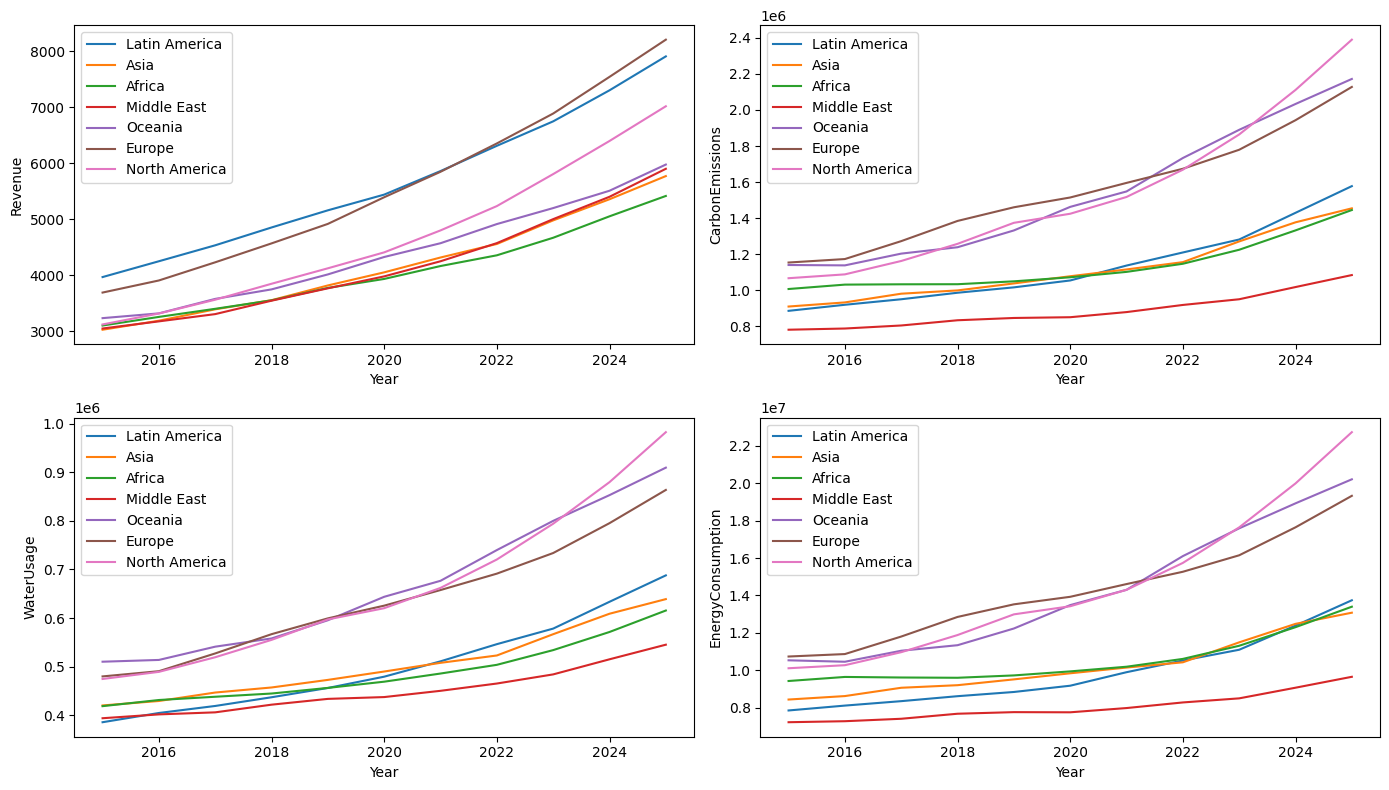

In [330]:
# plot of Average Revenue, CarbonEmission, WaterUsage, EnergyConsumption over past years of companies of different Regions.
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
cols = ["Revenue", "CarbonEmissions", "WaterUsage", "EnergyConsumption"]
axes = axes.flatten()  # Flatten the 2x2 array to a 1D array

for i, col in enumerate(cols):
    for region in df["Region"].unique():
        sns.lineplot(x="Year", y=col, data=df[df["Region"]==region], label=region, ci=None, ax=axes[i])
        # plt.title(f"{col} vs Year accross Different region")
    axes[i].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

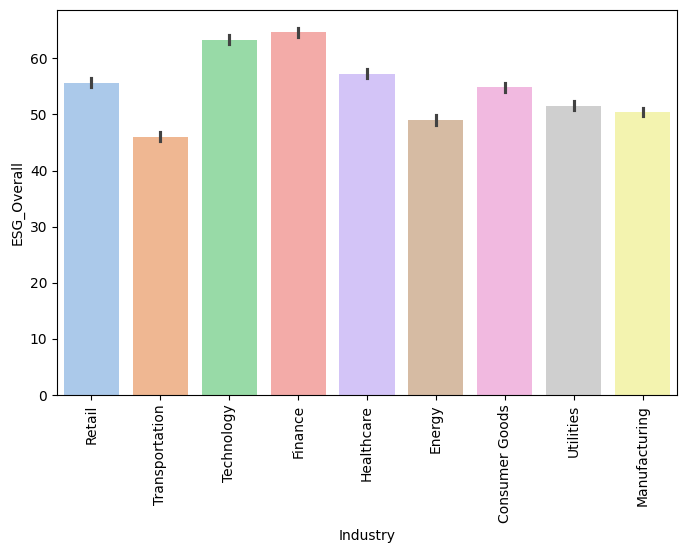

In [331]:
# plot of overall ESG Score vs different Industry for Average over past 10 years
plt.figure(figsize=(8, 5))
sns.barplot(x="Industry", y="ESG_Overall", data=df, palette='pastel')
plt.xticks(rotation=90)
plt.show()

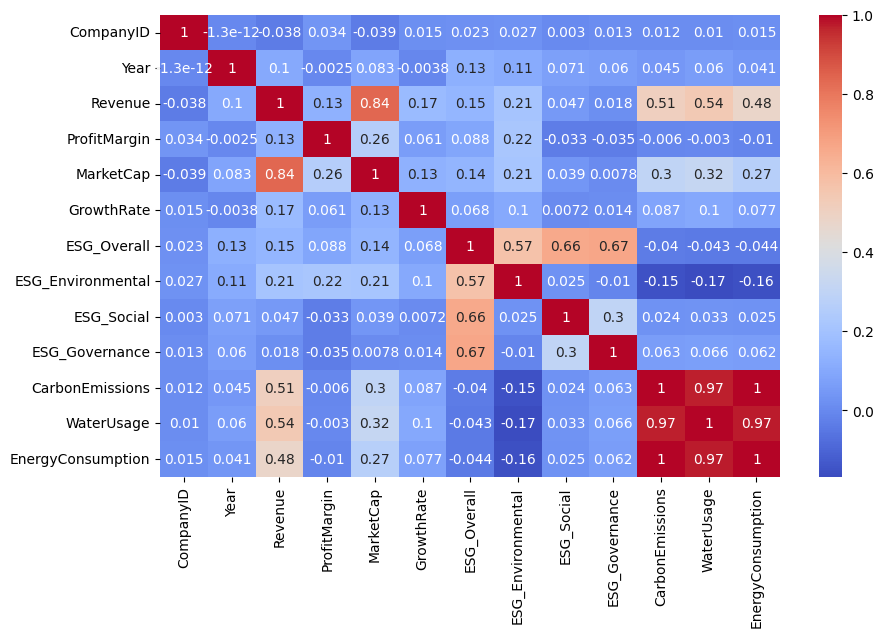

In [332]:
# Correlation matrix of Features
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.show()

## **Carbon Emission has correlation coefficient of 1 with Energy Consumption**

In [333]:
# Dropping features with correlation Coefficient of 1
df.drop("EnergyConsumption", axis=1, inplace=True)
df.head()

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7


## **Data Cleaning and Preprocessing**

In [334]:
# checking for missing values
print(df.isnull().sum()[df.isnull().sum()>0])

GrowthRate    1000
dtype: int64


In [335]:
# Handling Outliers
def cap_outliers_iqr(df, multiplier=1.5):
    df = df.copy()

    num_cols = df.select_dtypes(include=["number"]).columns

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        df[col] = df[col].clip(lower=lower, upper=upper)

    return df

df = cap_outliers_iqr(df, 1)

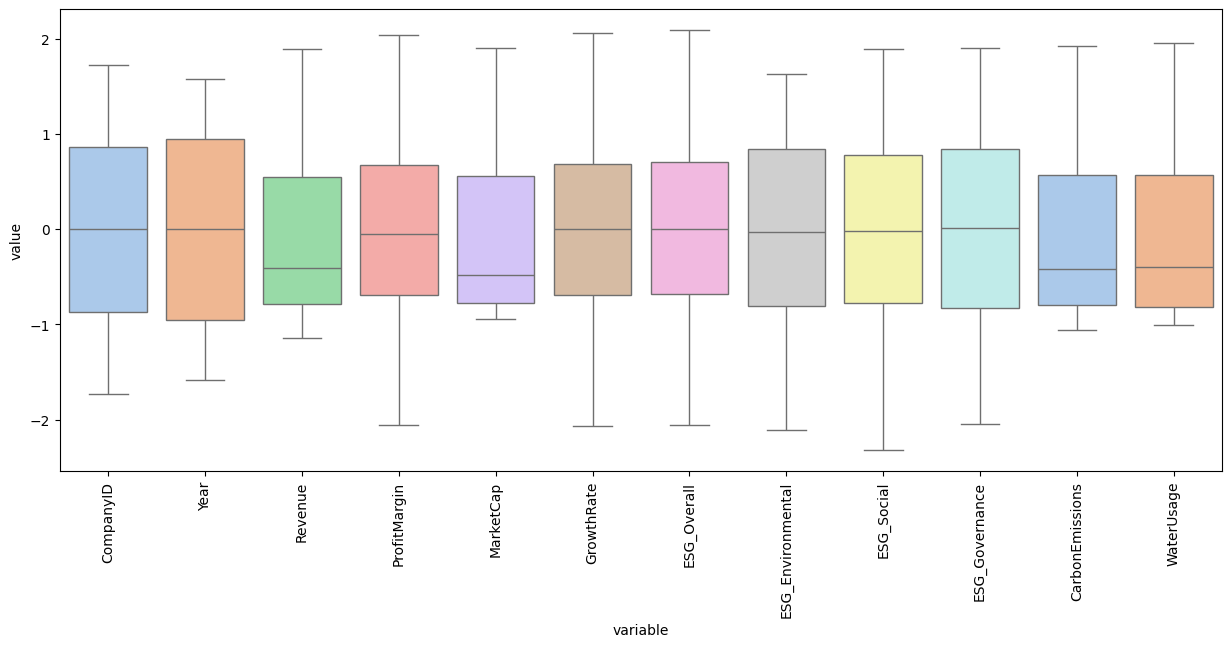

In [336]:
# Boxplot after Handling Outliers
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df.select_dtypes(include=np.number)),
                         columns=df.select_dtypes(include=np.number).columns)
# Convert the scaled data back to a DataFrame before passing to sns.boxplot


plt.figure(figsize=(15, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(scaled_df), palette="pastel")
plt.xticks(rotation=90)
plt.show()

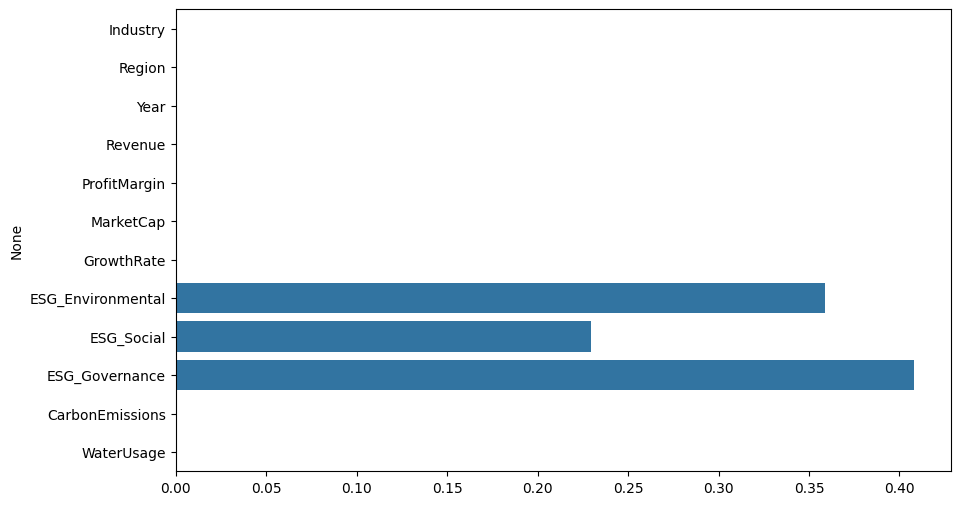

In [337]:
# checking feature importance score for ESG_Overall
y = df["ESG_Overall"]
X = df.drop(["ESG_Overall", 'CompanyName', 'CompanyID'], axis=1)

categorical_cols = X.select_dtypes(include="object").columns
for col in categorical_cols:
    X[col] = X[col].astype("category")

model = XGBRegressor(n_estimators=100, random_state=42, tree_method="hist", enable_categorical=True)
model.fit(X, y)

plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.show()


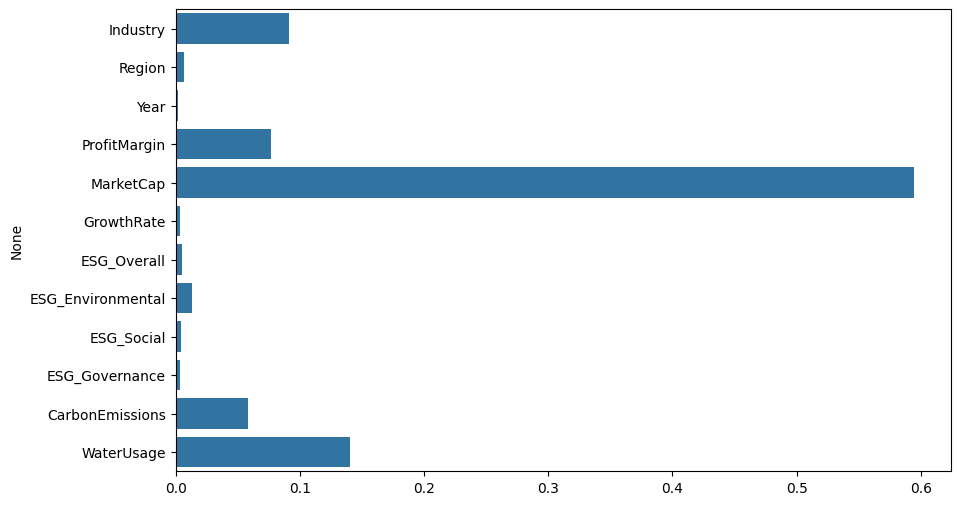

In [338]:
# checking feature importance score for Revenue
y = df["Revenue"]
X = df.drop(["Revenue", 'CompanyName', 'CompanyID'], axis=1)

categorical_cols = X.select_dtypes(include="object").columns
for col in categorical_cols:
    X[col] = X[col].astype("category")

model = XGBRegressor(n_estimators=100, random_state=42, tree_method="hist", enable_categorical=True)
model.fit(X, y)

plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.show()

### **One-Hot Encoding for categorical feature**

In [339]:
# One-Hot encoding for Industy and Region columns
df = pd.get_dummies(df, columns=["Industry", "Region"], drop_first=True, dtype=int)
df.head()

,CompanyID,CompanyName,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,...,Industry_Retail,Industry_Technology,Industry_Transportation,Industry_Utilities,Region_Asia,Region_Europe,Region_Latin America,Region_Middle East,Region_North America,Region_Oceania
0,1,Company_1,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,...,1,0,0,0,0,0,1,0,0,0
1,1,Company_1,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,...,1,0,0,0,0,0,1,0,0,0
2,1,Company_1,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,...,1,0,0,0,0,0,1,0,0,0
3,1,Company_1,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,...,1,0,0,0,0,0,1,0,0,0
4,1,Company_1,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,...,1,0,0,0,0,0,1,0,0,0


### **Feature Engineering**

In [340]:
# Create lag features
df["Revenue_lag1"] = df.groupby("CompanyID")["Revenue"].shift(1)
df["Revenue_lag2"] = df.groupby("CompanyID")["Revenue"].shift(2)

df["ESG_Overall_lag1"] = df.groupby("CompanyID")["ESG_Overall"].shift(1)
df["GrowthRate_lag1"] = df.groupby("CompanyID")["GrowthRate"].shift(1)


In [341]:
# RevenuePerCap: Revenue / MarketCap
df["RevenuePerCap"] = np.where(df["MarketCap"] != 0, df["Revenue"] / df["MarketCap"], 0)

# EmissionPerRevenue: CarbonEmissions / Revenue
df["EmissionPerRevenue"] = np.where(df["Revenue"] != 0, df["CarbonEmissions"] / df["Revenue"], 0)

# WaterPerRevenue: WaterUsage / Revenue
df["WaterPerRevenue"] = np.where(df["Revenue"] != 0, df["WaterUsage"] / df["Revenue"], 0)

df.head()

,CompanyID,CompanyName,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,...,Region_Middle East,Region_North America,Region_Oceania,Revenue_lag1,Revenue_lag2,ESG_Overall_lag1,GrowthRate_lag1,RevenuePerCap,EmissionPerRevenue,WaterPerRevenue
0,1,Company_1,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,...,0,0,0,NaN,NaN,NaN,NaN,1.360593,77.476916,38.738458
1,1,Company_1,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,...,0,0,0,459.2,NaN,57.0,NaN,1.292417,78.756226,39.378219
2,1,Company_1,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,...,0,0,0,473.8,459.2,56.7,3.2,1.802489,79.671446,39.835723
3,1,Company_1,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,...,0,0,0,564.9,473.8,56.5,19.2,1.973145,76.379119,38.189649
4,1,Company_1,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,...,0,0,0,558.4,564.9,58.0,-1.1,1.030478,75.382146,37.691073


In [342]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

## **Model Training and Evaluation**

In [343]:
# splitting Train and Test set
y_train = df[df["Year"] < 2022]["Revenue"]
y_test  = df[df["Year"] >= 2022]["Revenue"]

X_train = df[df["Year"] < 2022].drop(["CompanyName", "CompanyID", "Revenue"], axis=1)
X_test  = df[df["Year"] >= 2022].drop(["CompanyName", "CompanyID", "Revenue"], axis=1)

sc0 = StandardScaler()
X_train_scaled = sc0.fit_transform(X_train)
X_test_scaled = sc0.transform(X_test)

r2_score: 0.9992233275554785


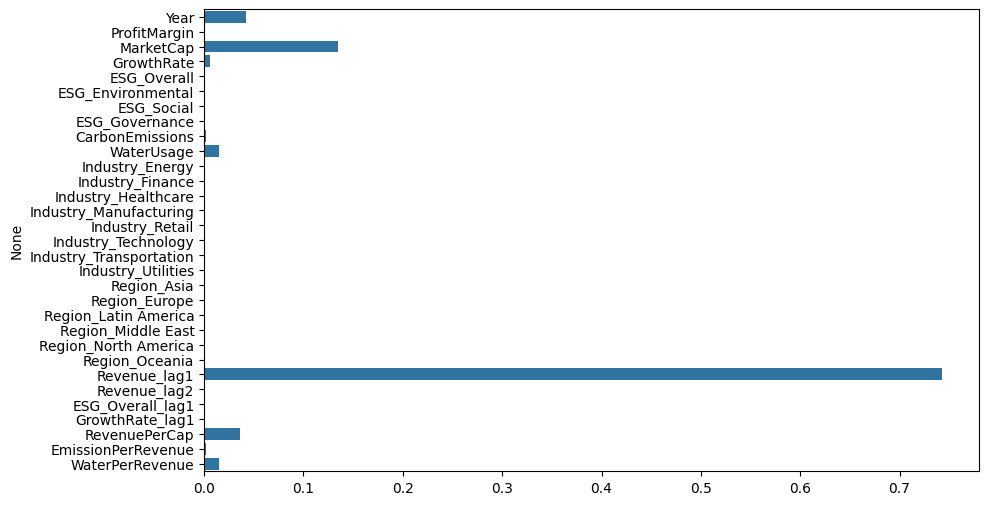

In [344]:
# evaluating Feature Impotance score of new Data Frame
model1 = XGBRegressor(n_estimators=100, random_state=42, tree_method="hist", enable_categorical=True)
model1.fit(X_train_scaled, y_train)
y_pred = model1.predict(X_test_scaled)
print(f"r2_score: {r2_score(y_test, y_pred)}")

plt.figure(figsize=(10, 6))
sns.barplot(x=model1.feature_importances_, y=df.drop(["CompanyName", "CompanyID", "Revenue"], axis=1).columns)
plt.show()

In [345]:
# Droping features with feature importance score less than 0.005
col = X_train.columns[model1.feature_importances_ > 0.005]

In [346]:
# evaluating Linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
print(f"r2_score: {r2_score(y_test, y_pred)}")

r2_score: 0.9595722171492114


### **HyperParameter Tuning**

In [347]:
# finding best set of parameter using Hyper Parameter tuning
param_grid = {
    'n_estimators':[100, 150, 200],
    'max_depth': [3, 5, 7,],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train[col])
X_test_sc = sc.transform(X_test[col])

xgbr = XGBRegressor(random_state=42, tree_method='hist', enable_categorical=True)
random_search = RandomizedSearchCV(xgbr, param_distributions=param_grid, n_iter=10, scoring='r2', cv=3, verbose=1, random_state=42)
random_search.fit(X_train_sc, y_train)

print(f'best parameters: {random_search.best_params_}')
print(f'best score: {random_search.best_score_}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best parameters: {'subsample': 1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}
best score: 0.9984675061338186


In [348]:
# testing our model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_sc)
print(f"r2_score: {r2_score(y_test, y_pred)}")

r2_score: 0.9996469770885779


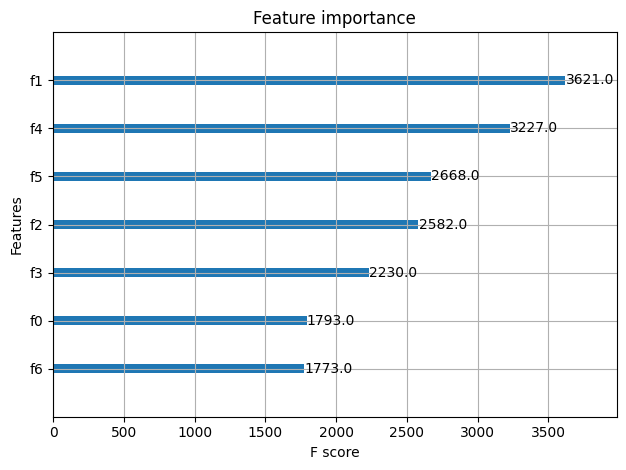

In [349]:
# saving our model
import joblib
joblib.dump(best_model, "xgb_model.pkl")
joblib.dump(sc, 'scaler.pkl')

# saving test predictions
results = pd.DataFrame({'Actual_Revenue': y_test, 'predicted_Revenue':y_pred})
results.to_csv('revenue_prediction.csv', index=False)

import xgboost as xgb
xgb.plot_importance(best_model)
plt.tight_layout()
plt.savefig('feature_importance.png')

In [350]:
# # Downloading Files
# from google.colab import files
# files.download('xgb_model.pkl')
# files.download('scaler.pkl')
# files.download('revenue_prediction.csv')
# files.download('feature_importance.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>